In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy.signal import find_peaks
from scipy.signal import medfilt
from scipy.signal import savgol_filter

In [176]:
def moving_average(x, window=3):
    box = np.ones(window)/window
    smoothed = np.convolve(x, box, mode="same")
    return smoothed

In [101]:
def normalize_df(input_df):
    for col in input_df.columns:
        input_df[col] = input_df[col]/input_df[col].max()
    return input_df        

In [102]:
def horizontal_sum(df):
    
    combined_signal = []
    
    signal_len = len(df.iloc[:, 0])
    
    for index in range(0, signal_len): 
        sum_horiz = 0
        for signal in df.columns:
            sum_horiz += df[signal][index]
        
        combined_signal.append(sum_horiz)
        
    return combined_signal
        

In [103]:
def compute_periodogram(input_signal):
    signal = np.array(input_signal) #np.array(input_signal.apply(lambda x: float(x)))
    pgram_python = (2.0/float(signal.size)) * np.power(np.fft.fft(signal), 2)
    indices = list(range(0, int(len(pgram_python)/2 + 1)))
    pgram_python = pgram_python[indices]
    return np.array(pgram_python.real)

In [104]:
def filter_data(input_signal):
    signal = np.array(input_signal)
    sigma = 2 #play around with this value to influence the degree of "smoothness"
    signal = ndimage.gaussian_filter1d(input_signal, sigma)
    return signal

In [203]:
def determine_squats(periodogram):
    
    periodogram = periodogram
    
    periodogram = list(periodogram)
    
    frames = len(periodogram)
        
    peaks = find_peaks(periodogram)
        
    max_frame = peaks[0][1]
    
    max_freq = max_frame/frames
    
    period = 1/max_freq
    
    num_squats = frames/period
        
    return num_squats
    

In [205]:
df = pd.read_csv("all_signals.csv", sep='\s*,\s*', encoding='ascii', engine='python', skiprows=[1])
df.columns = map(lambda x: x.strip(), list(df.columns)) #remove preceding " " and trailing " " from column names

In [206]:
df = df.iloc[:, 16:] #just get the interpolated values from the CSV

In [207]:
df.head()

,rightLegAngleSignal_interpolated,leftLegAngleSignal_interpolated,yPositionOfNoseSignal_interpolated,xPositionOfRHipSignal_interpolated,yPositionOfRHipSignal_interpolated,xPositionOfLHipSignal_interpolated,yPositionOfLHipSignal_interpolated
0,58.671307,70.641243,140.0,228.0,316.0,188.0,124.0
1,68.198593,53.130104,124.0,228.0,316.0,220.0,316.0
2,53.130104,38.659809,188.0,228.0,316.0,156.0,132.0
3,0.784825,31.159304,124.0,236.0,252.0,236.0,236.0
4,66.161263,86.877869,156.0,196.0,228.0,188.0,236.0


In [208]:
df = normalize_df(df) #normalized signals before combining them
combined_signal = horizontal_sum(df) #combine signals
combined_signal = medfilt(combined_signal, kernel_size=3) #use running median to get rid of outliers
combined_signal = moving_average(combined_signal, window=7)

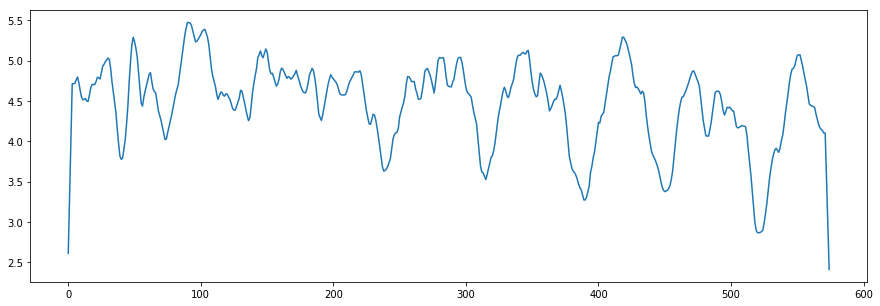

In [209]:
plt.figure(figsize=(15,5))
plt.plot(combined_signal)

In [210]:
pgram = compute_periodogram(combined_signal)
#combined_signal = savgol_filter(combined_signal, window_length=51, polyorder=3)

(0, 100)

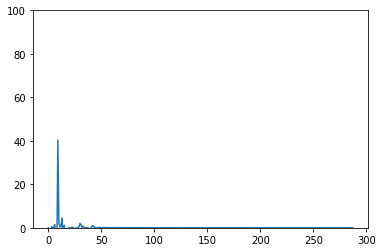

In [211]:
pgram[0] = 0 #the value @0 is infinity/undefined, so we can remove it
plt.plot(pgram)
plt.ylim(0,100)


In [212]:
print(determine_squats(pgram))

6.0
